[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

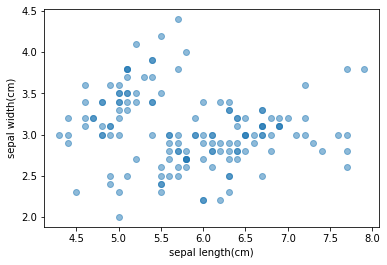

In [1]:
#ppt-1page

#sklearn 라이브러리에 포함된 datasets 모듈에서 아이리스 데이터를 로드
from sklearn import datasets
iris = datasets.load_iris()
samples = iris.data
print(samples)

#sepal length와 width 두 가지 feature만을 사용하도록 하겠음.
#데이터로부터 두 feature만을 뽑아내어 산점도를 그려봄(x축-length, y축-width)

from matplotlib import pyplot as plt
x = samples[:, 0]
y = samples[:, 1]
plt.scatter(x,y, alpha =0.5)
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width(cm)')
plt.show()

#Iris DataSet은 원래 label이 제공되지만, label이 없다고 가정하고,
#K-Mean 알고리즘으로 위데이터를 그룹화 함.
#K-Means 클러스터링 알고리즘을 사용한다.


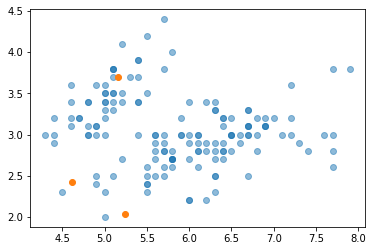

In [2]:
#ppt2

#step1.place K Random Centroids : 제일 먼저 K개의 centroids( 중심값)를 임의로 지정
#3가지 종이 존재하므로 K=3으로 설정한다.

import numpy as np
k=3

#랜덤으로 x,y좌표 3개를 생성합니다.
#np.random.uniform 은 주어진 최대 최소값 사이에서 k개 만큼 실수 난수를 생성합니다.
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))

#centroids는 임의로 생선한 (x,y) 좌표를 3개를 갖게 됨.
plt.scatter(x,y, alpha=0.5)
plt.scatter(centroids_x, centroids_y)
plt.show()

In [3]:
#ppt3

#step2 : Assigns Datas to Nearest Centroid
#centroids에 가까운 데이터들을 할당. '가깝다'라는 것을 정량적으로 계산하기 위해
# 각 데이터를 벡터로 간주하여 유클리드 거리를 계산한다.
#두 데이터 포인트 사이의 거리를 계산하는 distance() 함수를 작성

def distance(a,b) :
    return sum([ (el_a - el_b)**2 for el_a, el_b in list(zip(a,b)) ]) ** 0.5 



# 각 데이터들 별로 3개의 centroids와의 거리를 측정.lalbels라는 배열을 생성하고,
#가장 가까운 centroids의 index를 저장한다.
#각 데이터 포인트를 그룹화할 labels를 생성합니다(0,1,2)

labels = np.zeros(len(samples))
sepal_length_width = np.array(list(zip(x,y)))


# 각 데이터를 순회하면서 centroids와의 거리를 측정합니다.


for i in range(len(samples)):
    distances = np.zeros(k) #초기 거리는 모두 0으로 초기화, 3개 요소 1차원 배열(K=3)
    for j in range(k):
        distances[j] = distance(sepal_length_width[i], centroids[j] )
    cluster = np.argmin(distances)   # np.argmin는 가장 작은 값의 index를 반환합니다.
    labels[i] = cluster

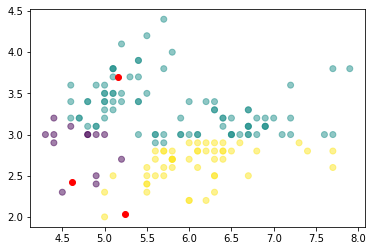

In [4]:
#ppt-4

# 생성된 labels에는 0,1,2가 저장되어 각 데이터(iris data)가 어느 centroid그룹에 속해있는지를 나타냄. 시각화를 통해 확인한다.

plt.scatter(x,y, c=labels, alpha=0.5)
plt.scatter(centroids_x,centroids_y,c='red')
plt.show()

#데이터들이 가까운 centroids에 잘 할당되어 있지만, 처음 centroid를 선택할 때 랜덤으로 선택했으므로 최적화가 필요하다.

In [5]:
#ppt4

#step3. Update Centroids - centroids를 새롭게 지정함으로써 데이터를 더 잘 그룹화 할 수 있도록 만들어야 한다.
#기존에 지정한 centroids를 복사해두어 centroids_old 에 저장

from copy import deepcopy
centroids_old = deepcopy(centroids)


# 각 그룹별로 데이터의 평균을 계산. 즉, 각 데이터들의 평군 x좌표와 평균 y좌표를 계산하여 하나의 좌표를 계산.
# 이렇게 계산된 좌표는 새로운 centroids로 지정.

for i in range(k):
    # 각 그룹에 속한 데이터들만 골라 points에 저장. labels에 섞인 값을 sepal_length_width에 구분하여 저장
    #points는 각각 그룹의 x,y좌표를 가진 list이다.
    points = [ sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i ]
    centroids[i] = np.mean(points, axis=0)
    #points의 각 feature, 즉 각 좌표의 평균 지점을 centroid로 지정한다.
    
#data 및 type를 확인.
print(centroids)
print(type(centroids))
print(centroids_old)
print(type(centroids_old))

[array([4.7       , 2.85384615]), array([5.87701149, 3.32873563]), array([6.082, 2.638])]
<class 'list'>
[(4.619387750145651, 2.421657586117742), (5.158424344719011, 3.703100790428135), (5.23823261512803, 2.0397492171370275)]
<class 'list'>


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


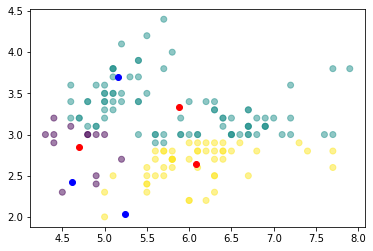

In [6]:
#ppt5

centroids = np.array(centroids)
centroids_old = np.array(centroids_old)
print(type(centroids))
print(type(centroids_old))

#기존 centroids_old와 centroids의 위치 비교
plt.scatter(x,y,c=labels, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 1], c='red')
plt.scatter(centroids_old[:,0], centroids_old[:,1], c='blue')
plt.show()
#Centroids가 전체적으로 중앙으로 이동하여 데이터의 중심 지점에 위치한 것을 확인할 수 있음.

In [7]:
#step4/ 2~3스텝을 계속 반복한다 Convergence(집중점, 집합점)
#필요한 모든 Building blocks를 구현. 2~3단계를 반복하여 최적의 centroids를 찾는 것이 목표이다.
#그런데 언제까지 찾을것인가?
#error라는 배열을 생성한다. error의 각 index는 centroids_old와 새롭게 지정된 centroid의 거리를 저장한다.
#이 거리가 모두 0이 되면 최적해에 수렴(Convergence)한 것으로 판단하여 반복을 종료한다.

centroids_old = np.zeros(centroids.shape)
labels = np.zeros(len(samples))
error = np.zeros(k)

for i in range(k):
    error[i] : distance(centroids_old[i], centroids[i])


In [8]:
while(error.all() != 0) : #열의 데이터 중 조건과 맞는 데이터가 있으면 True / 전혀 없으면 False
    #step2 : 가까운 centroids에 데이터를 할당합니다.
    for i in range(len(samples)) :
        distances = np.zeros(k)    #초기 거리는 모두 0으로 초기화 해줍니다.
        for j in range(k):
            distance[j] = distance(sepal_length_width[i], centroids[j])
        cluster = np.argmin(distances)  #np.argmin은 가장 적은 값의 index를 반환.
        labels[i] = cluster
        
    #step3 : centroids를 업데이트
    centroids_old = deepcopy(centroids)
    for i in range(k):
        #각 그룹에 속한 데이터들만 골라 points에 저장합니다.
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i ]
        #
        centroids[i] = np.mean(points, axis=0)
    
    for i in range(k):
        error[i] = distance(centroids_old[i], centroids[i])

IndexError: too many indices for array

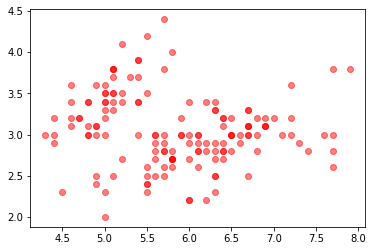

In [9]:
colors=['r','g','b']
for i in range(k) :
    points = np.array( [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i ] )
    plt.scatter(points[:, 0], points[:, 1], c= colors[i], alpha=0.5)
    
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D',s=150 )
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()